In [94]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
import pandas as pd


file_name = r"I:\2023 ILI Pipe Tally Consolidation\All_ILIData.csv"

# Read the file
data = pd.read_csv(file_name, low_memory=False)

# Output the number of rows
print("Total rows: {0}".format(len(data)))

# See which headers are available
print(list(data))

Total rows: 2008441
['Vendor', 'Source', 'Route', 'Route_NoPrefix', 'MP1', 'MP2', 'Year', 'ILI Project Name', 'ML Survey Date', 'Alignment Comment', 'Joint / US GW Number', 'ILI Survey Distance (ft)', 'Joint Length (ft)', 'From U/S GW (ft)', 'To D/S GW (ft)', 'Identification', 'Comment', 'Tool Speed (mph)', 'WT (in)', 'SMYS (PSI)', 'MAOP (PSI)', 'OD (in)', 'Longseam Visible', 'Seam Pos.', 'Depth (%)', 'Depth* (with tool tolerances)', 'OD Reduction (%)', 'Length (in)', 'Width (in)', "O'clock", 'Internal', 'Bend Radius (D)', 'Bend Angle (degrees)', 'Bend Direction', 'POF Category', 'Associated Tool Tolerance', 'Anomaly ID', 'Estimated Failure Pressure (Pf) ', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP', 'TotalBend Strain', 'Bend - Vert Strain Component', 'Bend - Horiz Strain Component', 'Internal Dent Strain', 'External Dent Strain', 'Easting', 'Northing', 'Latitude', 'Longitude', 'Elevation', 'U/S Reference', 'Dist. To U/S Ref [ft]', 'D/S Reference', 'Dist. To D/S Ref [ft]', 'IL

Maybe save this as a binary file so it's easier to load?

In [81]:
# data.to_hdf('data.h5', key='ILI_data', mode='w')

# to load, do:
# pd.read_hdf('data.h5', 'ILI_data')  

In [38]:
data["PG&E Station Number"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
2008436     74.256
2008437     74.762
2008438     76.073
2008439     78.996
2008440    104.991
Name: PG&E Station Number, Length: 2008441, dtype: object

In [9]:
# Make the survey date into Date type
date_field = "ML Survey Date"
data[date_field]

0         2001-10-25
1         2001-10-25
2         2001-10-25
3         2001-10-25
4         2001-10-25
             ...    
2008436   2023-02-17
2008437   2023-02-17
2008438   2023-02-17
2008439   2023-02-17
2008440   2023-02-17
Name: ML Survey Date, Length: 2008441, dtype: datetime64[ns]

In [10]:
data[date_field] = pd.to_datetime(data[date_field])

In [11]:
data[date_field]

0         2001-10-25
1         2001-10-25
2         2001-10-25
3         2001-10-25
4         2001-10-25
             ...    
2008436   2023-02-17
2008437   2023-02-17
2008438   2023-02-17
2008439   2023-02-17
2008440   2023-02-17
Name: ML Survey Date, Length: 2008441, dtype: datetime64[ns]

In [13]:
year_to_filter = 2022
filtered_df = data[data[date_field].dt.year == year_to_filter]

In [37]:
filtered_df["MP1"].isna().sum()

0

In [17]:
# 5.5% of the total rows come from 2022.
len(filtered_df) / len(data)

0.055749210457265115

In [23]:
location_fields = [date_field, 'Longitude', 'Latitude', 'Elevation', 'U/S Reference', 'Dist. To U/S Ref [ft]', 'D/S Reference', 'Dist. To D/S Ref [ft]']

In [24]:
filtered_df[location_fields]

,ML Survey Date,Longitude,Latitude,Elevation,U/S Reference,Dist. To U/S Ref [ft],D/S Reference,Dist. To D/S Ref [ft]
1847283,2022-12-21,NaN,NaN,NaN,O001,0.000,AGM002,69.638
1847284,2022-12-21,NaN,NaN,NaN,O001,7.517,AGM002,62.121
1847285,2022-12-21,NaN,NaN,NaN,O001,7.525,AGM002,62.113
1847286,2022-12-21,NaN,NaN,NaN,O001,7.533,AGM002,62.105
1847287,2022-12-21,NaN,NaN,NaN,O001,10.154,AGM002,59.484
...,...,...,...,...,...,...,...,...
1959247,2022-11-21,-120.492586,36.539648,551.25,AGM,20.770,NaN,NaN
1959248,2022-11-21,-120.492593,36.539641,551.28,AGM,24.310,NaN,NaN
1959249,2022-11-21,-120.492595,36.539639,551.29,AGM,25.120,NaN,NaN
1959250,2022-11-21,-120.492597,36.539636,551.30,AGM,26.430,NaN,NaN


Not all the anomaly have longtitude and latitude, or stationing number. Can I ignore them?

In [40]:
filtered_df["Longitude"].isna().sum() / len(filtered_df)

0.0026971751109682142

Only 0.26% of the anomaly listings don't have coordinates...maybe it's ok? Is there some kind of distribution patterns for this?

In [43]:
no_coordinates_listings = filtered_df["Longitude"].isna()

In [48]:
filtered_df[no_coordinates_listings].head()

,Vendor,Source,Route,Route_NoPrefix,MP1,MP2,Year,ILI Project Name,ML Survey Date,Alignment Comment,...,Northing,Latitude,Longitude,Elevation,U/S Reference,Dist. To U/S Ref [ft],D/S Reference,Dist. To D/S Ref [ft],ILI Vendor Comments,PG&E Station Number
1847283,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,0.000,AGM002,69.638,Other Data Limit O001,NaN
1847284,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.517,AGM002,62.121,Other Weld W001,NaN
1847285,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.525,AGM002,62.113,Other Manufacturing Related O002,NaN
1847286,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.533,AGM002,62.105,Other Manufacturing Related O003,NaN
1847287,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,10.154,AGM002,59.484,Feature Metal Loss A001,NaN


In [56]:
np.unique(filtered_df[no_coordinates_listings]["Route"])

array(['L-148', 'L-173'], dtype=object)

In [63]:
no_coordinates_station_number = filtered_df[no_coordinates_listings]["PG&E Station Number"]

In [68]:
print(f"{no_coordinates_station_number.isna().sum() / len(no_coordinates_station_number) * 100}% of all anomalies without coordinates have no station numbers")

85.76158940397352% of all anomalies without coordinates have no station numbers


In [76]:
print(f"There are {len(np.unique(no_coordinates_station_number[no_coordinates_station_number.notna()]))} unique station numbers present for anomalies WITH coordinates")

There are 43 unique station numbers present for anomalies WITH coordinates


In [78]:
np.unique(filtered_df[no_coordinates_listings]["ILI Project Name"])

array(['L-148 - MP 17.18 to MP 17.46 - 2022',
       'L-173 - MP 1.59 to MP 1.69 - 2022'], dtype=object)

In [79]:
17.46-17.18, 1.69-1.59

(0.28000000000000114, 0.09999999999999987)

# Segment ILI data

In [82]:
from typing import Tuple

def make_ILI_data_for_year(
    all_ILI_df: pd.DataFrame,
    year: int
) -> Tuple[pd.DataFrame, str]:
    date_field = "ML Survey Date"
    all_ILI_df[date_field] = pd.to_datetime(all_ILI_df[date_field])
    filtered_df = all_ILI_df[all_ILI_df[date_field].dt.year == year]
    # save as file
    file_name = f"cleaned_ILI_{year}.csv"
    filtered_df.to_csv(file_name, index=False)
    return (filtered_df, file_name)

In [83]:
df_2022, csv_2022_name = make_ILI_data_for_year(data, 2022)

In [97]:
csv_2022_name

'cleaned_ILI_2022.csv'

# Look at failure pressure

In [85]:
FP_fields = ['Estimated Failure Pressure (Pf) ', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP']

In [92]:
available_pf = df_2022["Estimated Failure Pressure (Pf) "][df_2022["Estimated Failure Pressure (Pf) "].notna()]

(array([3.5400e+02, 1.9453e+04, 7.1850e+03, 5.4730e+03, 2.1500e+02,
        6.0000e+00, 2.6000e+01, 1.9000e+01, 1.3000e+01, 1.0000e+01]),
 array([ 663.55 , 1138.479, 1613.408, 2088.337, 2563.266, 3038.195,
        3513.124, 3988.053, 4462.982, 4937.911, 5412.84 ]),
 <BarContainer object of 10 artists>)

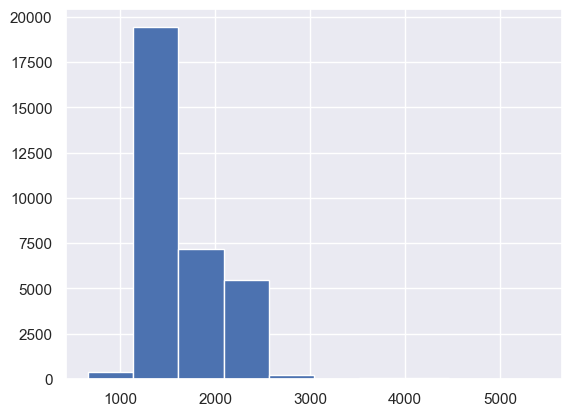

In [96]:
plt.hist(available_pf)